# TP: Introduction au langage R
## I. Pré-traitement
### I.1 Librairies

### I.2 Variables globales

## II. Grand classique de la programmation: les années bissextile
Le but de cet exercice est de manipuler les éléments basiques de la programmation dans R avec un exercice classique: calculer si une année est (ou non) bissextile. Rappelons que:

*Une année est bissextile si:*
- *Elle est divisible par 4,*
- *N'elle n'est pas divisible par 100,*
- *Sauf si elle est divisible par 400.*

Par exemple : 1999 et 1900 ne sont pas bissextiles, par contre 1996, 2000 et 2004 le sont.

Cet exercice va nous permettre de manipuler quelques basiques de la programmations :
- Arithmétique élémentaire (reste d'une division euclidienne),
- Tests logique,
- Opérations sur les tests,
- Fonctions,
- Boucle,
- Vectorialisation.

### II.1 Division euclidienne et test d'égalité
En R, la division Euclidienne et son reste se font avec les opérateurs `%/%` et `%%`. Autrement dit, si on fait la division euclidienne de `y` par `x`, on a: `y = x * (y %/% x) + (y %% x)`.

***Quelques tests***
Pour différentes valeur de `x` et `y` que vous choisirez, calculez la division euclidienne de `y` par `x` ainsi que le rester, et vérifiez qu'on a bien `y = x * (y %/% x) + (y %% x)`

In [ ]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################

Plutot que de vérifier séparement que `y` est égal à `x * (y %/% x) + (y %% x)`, on voudrait *tester* cette égalité. Cette opération peut se faire grace à un *test logique*, donnée par l'opérateur `==`. Cet opérateur peut renvoyer deux valeurs: `TRUE` (si l'égalité est vrai) ou `FALSE` (si l'égalité est fausse). Dans la pratique:

***Afficher***
- `0 == 3`
- `0 == 0`
- `2 == 2`
- `0 == (1-1/3-2/3)`

Quel est le problème avec le dernier test ?

In [69]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################

***Question*** Avec cet opérateur, vérifiez qu'on a bien `y = x * (y %/% x) + (y %% x)` pour diverses valeurs de `y` et `x`.

In [70]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################

***Question*** Avec ce que nous venons de voir, comment vérifier qu'une année `y` est divisible par 4 ? Par 100 ? Par 400 ?

In [70]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################

Dans la définition des années bissextiles, l'année `y` *ne doit pas* être divisible par 100. Ceci peut-être fait de deux manière:

- Soit avec l'opérateur `!=`, qui au lieu de test l'égalité, vérifie que deux nombres sont différents,
- Soit en appliquant l'opérateur `!` au test d'égalité.

Autrement dit on a l'égalité entre `a != b` et `!(a==b)`.

***Question*** Avec chacun de ces approches, comment vérifier que `y` n'est pas divisible par 100 ?

In [70]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################

### II.2. Factoriser son code: les fonctions
Examinons le code suivant:

```
addition = function( x , y )
{
    return( x + y )
}

addition( 2 , 3 ) ## == 5
```

Ce code est ce qu'on appelle une *fonction*. C'est un bloc de code autonome qui peut être appelé à n'importe quel endroit d'un script. Les éléments `x` et `y` sont les *entrées* (libre à vous d'en mettre plus ou moins). Le mot clé `return` permet d'indiquer ce qui est renvoyé par la fonction. Les fonctions permettent de:

- Factoriser le code (si un ensemble d'instruction est utilisé plusieurs fois, on les met dans une fonction et on appelle la fonction)
- Découper des scripts complexes en une suite de fonction lisibles, chacune ayant une tache bien précise.

Code de bonne conduite pour construire une fonction:
- Le nom d'une fonction doit permettre de comprendre ce que va faire la fonction
- Une fonction doit être autonome, i.e. elle ne doit pas utiliser de variables exterieure à sa définition.
- Elle doit toujours comprendre un `return` quitte à terminer sur `invisible(NULL)` si elle ne renvoie rien.

***Questions***
Ci dessous trois exemples de mauvaises fonctions, trouver les problèmes et les corriger.

```
m_f = function()
{
    print("je suis une mauvaise fonction")
    invisible(NULL)
}
```

```
mauvaise_fonction = function()
{
    print("je suis aussi une mauvaise fonction")
}
```

```
x = 3
tres_mauvaise_fonction = function()
{
    print("je suis une tres mauvaise fonction qui va occasioner beaucoup de probleme")
    return(x+2)
}
```

In [75]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################

In [76]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################

In [77]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################

***Questions*** En s'inspirant de ce qui précède, construire trois fonctions qui prennent en entrée une année `y`, et qui renvoie `TRUE` si l'année est divisible par 4 (resp. 100 et 400), et `FALSE` sinon.

In [83]:
####################################
## Écrire votre réponse entre ici...

divisible_par_4 = function(y)
{
	return(y %% 4 == 0)
}

## ... et la
####################################

In [84]:
####################################
## Écrire votre réponse entre ici...

divisible_par_100 = function(y)
{
	return(y %% 100 == 0)
}

## ... et la
####################################

In [85]:
####################################
## Écrire votre réponse entre ici...

divisible_par_400 = function(y)
{
	return(y %% 400 == 0)
}

## ... et la
####################################

***Questions*** Les trois fonctions que vous venez de code sont extremement similaires. Construisez une fonction qui prend une année `y` et un entier `x`, et qui renvoie `TRUE` si `y` est divisible par `x`, et `FALSE` sinon.

In [86]:
####################################
## Écrire votre réponse entre ici...

divisible_par_x = function( y , x )
{
	return(y %% x == 0)
}

## ... et la
####################################

### II.3 Opérations sur les booléens: le OU et le ET
Dans cette section nous allons introduire les deux opérateurs logiques suivants:

- le OU, noté `||`
- le ET, noté `&&`

Par exemple `TRUE && TRUE == TRUE`, ou encore ` (1 < 2) && (1 > 0) == TRUE`.

***Question*** En jouant avec ces opérateurs, remplissez les tableaux suivants:

|  ET   | TRUE  | FALSE  |
|-------|:-----:|:------:|
| TRUE  |  TRUE |    ?   |
| FALSE |   ?   |    ?   |


|  OU   | TRUE  | FALSE  |
|-------|:-----:|:------:|
| TRUE  |   ?   |    ?   |
| FALSE |   ?   |    ?   |

***Question*** Quels opérateurs mathématiques sont équivalents au OU et au ET ?

In [71]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################

***Questions***

- En mélangeant tout ce que vous venez d'apprendre, construisez une fonction qui renvoie `TRUE` si l'année `y` est bissextile, et `FALSE` sinon.
- Tester votre fonctions sur les années suivantes : 1900, 1996, 1999, 2000 et 2004.

In [93]:
####################################
## Écrire votre réponse entre ici...

est_bissextile = function(y)
{
	possibilite_1 = divisible_par_x( y , 4 ) && !divisible_par_x( y , 100 )
	possibilite_2 = divisible_par_x( y , 400 )
	return( possibilite_1 || possibilite_2 )
}

print(est_bissextile(1900))
print(est_bissextile(1996))
print(est_bissextile(1999))
print(est_bissextile(2000))
print(est_bissextile(2004))

## ... et la
####################################

[1] FALSE
[1] TRUE
[1] FALSE
[1] TRUE
[1] TRUE


### II.4 Boucle et vectorialisation
Posons le problème suivant: *je veux afficher pour toutes les années entre 1850 et 2100 si elle sont bissextiles ou non*.

Autrement dit, pour 250 années nous voulons savoir si elle sont bissextiles. Il est impraticable d'écrire 250 lignes de code appelant chacune la fonction qui teste si une année est bissextile ou non, i.e. un code de la forme:

```
est_bissextile(1850)
est_bissextile(1851)
est_bissextile(1852)
## ... plein de lignes
est_bissextile(2099)
est_bissextile(2100)
```

Pour résoudre ce problème, nous allons proposer deux approches:
- Une boucle `for`
- La vectorialisation

#### II.4.1 Les vecteurs

La première chose est de pouvoir stocker les années entre 1850 et 2100 dans une unique variable. Nous allons donc devoir manipuler des vecteurs. Voici quelques manières de créer des vecteurs:

***Questions***

- Afficher `1:10`, que fait ce code?
- Afficher `numeric(10)`, que fait ce code?
- Afficher `base::c(1,4,8,-3,1.5)`, que fait ce code?
- Afficher `base::seq( 3 , 12 )`, que fait ce code?
- Afficher `base::seq( 1 , 20 , 3 )`, que fait ce code?
- Afficher `base::seq( 10 , 5 , -1 )`, que fait ce code?
- Afficher `base::seq( 0 , 1 , length = 10 )`, que fait ce code?
- Choisissez un des vecteurs précédents, stocker le dans une variable `y`, et afficher `y[1]`, `y[2]`, `y[0]`, `y[-1]`. Conclusion?

In [111]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################

***Question*** Construisez un vecteur `years` qui contient les années entre 1850 et 2100

In [119]:
####################################
## Écrire votre réponse entre ici...

years = base::seq( 1850 , 2100 , 1 )

## ... et la
####################################

#### II.4.2 Les boucles `for`

Examinez et executez le code suivant:

```
for( i in base::seq( 1 , 5 ) )
{
    print(i)
}
```

***Question***
- Que fait ce code, comment fonctionne t'il ?
- En vous inspirant de ce code, et à l'aide du vecteur `years` de la section precedente, affichez si une année est bissextiles ou non entre 1850 et 2100

In [113]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################

#### II.4.3 Vectorialisation
Même si les boucles for ont le mérite de la simplicité, elles sont atrocement lente en R, et il vaut mieux éviter de les utiliser. C'est ici qu'intervient la *vectorialisation*: appliquer directement une fonction ou un operateur non plus à un nombre, mais à un *vecteur*.

***Question*** Pourquoi cette approche est meilleure qu'une boucle for ?

***Question*** Essayez d'appliquer directement votre fonction pour tester si une année est bissextile au vecteur `years`. Que se passe t'il ?


In [118]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################

***Question***

Executer le code suivant:

```
base::c(TRUE,TRUE,FALSE,FALSE) & base::c(TRUE,FALSE,TRUE,FALSE)
base::c(TRUE,TRUE,FALSE,FALSE) | base::c(TRUE,FALSE,TRUE,FALSE)
```

Quel est le résultat ?

In [120]:
####################################
## Écrire votre réponse entre ici...



## ... et la
####################################

***Question*** Adaptez votre fonction de calcul d'année bissextile pour qu'elle opère sur des vecteurs (sans utiliser de boucle for)

In [121]:
####################################
## Écrire votre réponse entre ici...

est_bissextile = function(y)
{
	possibilite_1 = divisible_par_x( y , 4 ) & !divisible_par_x( y , 100 )
	possibilite_2 = divisible_par_x( y , 400 )
	return( possibilite_1 | possibilite_2 )
}

## ... et la
####################################

***Question***
Executez le code suivant:
```
x = base::seq( -1 , 1 , 10 )
print(x[x < 0])
```

- Qu'avez vous affiché ?
- Adaptez ce code pour afficher les années bissextiles entre 1850 et 2100

In [123]:
####################################
## Écrire votre réponse entre ici...

print( years[est_bissextile(years)])

## ... et la
####################################

 [1] 1852 1856 1860 1864 1868 1872 1876 1880 1884 1888 1892 1896 1904 1908 1912
[16] 1916 1920 1924 1928 1932 1936 1940 1944 1948 1952 1956 1960 1964 1968 1972
[31] 1976 1980 1984 1988 1992 1996 2000 2004 2008 2012 2016 2020 2024 2028 2032
[46] 2036 2040 2044 2048 2052 2056 2060 2064 2068 2072 2076 2080 2084 2088 2092
[61] 2096


## III. Premier pas dans l'aléa: simulation d'un lancé de dé
### III.1 Fonction `base::sample`
Taper `help(sample)` dans une console R. À quoi correspond chacun de ces arguments:
- `x`
- `size`
- `replace`
- `prob`
Qu'est ce qu'un argument *obligatoire*? *Optionel* ?

In [174]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################

***Question*** Avec la fonction `base::sample`:
- Tirer avec remise 7 entiers entre 1 et 10
- Tirer sans remise 7 entiers entre 1 et 10

In [175]:
####################################
## Écrire votre réponse entre ici...

## ... et la
####################################

### III.2 Lançons les dés
Avec la fonction `base::sample`, créer une fonction `jet_de` qui prend en entrée un entier `n` (le nombre de fois qu'on lancera un dé), et qui renvoie un vecteur de taille `n` contenant le numéro de la face de dé tiré, pour un dé à 6 face.

In [176]:
####################################
## Écrire votre réponse entre ici...

jet_de = function( n )
{
	return( base::sample( 6 , n , replace = TRUE ) )
}

## ... et la
####################################

***Question*** Effectuez 10000 lancé de dés, et comptez le nombre de 1, de 2, ..., de 6. Afficher le résultat en *nombre d'occurences*, et en *fréquences*.
Indices:
- Utilisez la fonction `base::sum`,
- Que valent les sommes `TRUE + TRUE`, `TRUE + FALSE`, `FALSE + FALSE`

In [179]:
####################################
## Écrire votre réponse entre ici...

X = jet_de(100000)
face = numeric(n_face)
for( i in 1:n_face )
{
	face[i] = base::sum(X==i)
}
print(face)
print(face/base::sum(face))

## ... et la
####################################

[1] 16714 16504 16742 16674 16563 16803
[1] 0.16714 0.16504 0.16742 0.16674 0.16563 0.16803


### III.3 Changeons de type de dés
***Question*** En vous basant sur la fonction `jet_de`, construisez une fonction `jet_custom_de` qui prend en argument obligatoire le nombre de jet de dés `n`, et le nombre de face du dé `n_face`.

In [153]:
####################################
## Écrire votre réponse entre ici...

jet_custom_de = function( n , n_face = 6 )
{
	return( base::sample( n_face , n , replace = TRUE ) )
}

## ... et la
####################################

***Question*** À l'aide d'une boucle, pour `n_face = 2,3,6,10,20`, effectuez 10000 lancé de dés, et affichez la fréquence de chaque face. 

In [180]:
####################################
## Écrire votre réponse entre ici...

for( n_face in base::c(2,3,6,10,20) )
{
	X = jet_custom_de( 10000 , n_face )
	face = numeric(n_face)
	for( i in 1:n_face )
	{
		face[i] = base::sum( X == i )
	}
	print( face / base::sum(face) )
}

## ... et la
####################################

[1] 0.4973 0.5027
[1] 0.3382 0.3274 0.3344
[1] 0.1761 0.1700 0.1656 0.1589 0.1665 0.1629
 [1] 0.1011 0.1000 0.0944 0.1010 0.1013 0.0994 0.1008 0.1004 0.0959 0.1057
 [1] 0.0512 0.0511 0.0506 0.0516 0.0500 0.0517 0.0471 0.0480 0.0500 0.0502
[11] 0.0554 0.0479 0.0472 0.0531 0.0487 0.0482 0.0513 0.0471 0.0514 0.0482


***Question*** Quel loi de probabilité suit la variable `face`?

## IV. Statistiques et calcul matriciel
Le but de cet exercice est:

- De jouer avec les matrices,
- De savoir appliquer une fonction le long des colonnes / lignes d'une matrice,
- De jouer avec deux lois statistiques de base: la loi normale et exponentielle,
- De savoir dériver quelques statistiques de base d'un jeu de donnée.

### IV.1 Création d'une jeu de donnée "climatique" idéalisé

Nous allons commencer par créer une fonction qui va générer notre jeu de donnée. Nous voulons générer une matrix `X` tel que:
- La première colonne suive une loi normale $\mathcal{N}(\mu = 0,\sigma^2=1)$ (similaire à des températures)
- La seconde colonne suive une loi exponentielle $\mathcal{E}(\lambda=2)$ (vaguement similaire à des précipitations).

À l'aide de la documentation des fonctions `base::matrix`, `stats::rnorm` et `stats::rexp`, construire un fonction `generate_perfect_climate_data` qui prend en entrée un entier `n` (le nombre d'observations de notre jeu de donnée) et qui renvoie une matrix `X` avec les caractéristiques précédentes.


In [267]:
####################################
## Écrire votre réponse entre ici...

generate_perfect_climate_data = function(n)
{
	X = matrix( NA , nrow = n , ncol = 2 )
	X[,1] = stats::rnorm( n , mean = 0 , sd = 1 )
	X[,2] = stats::rexp( n , rate = 2 )
	
	return(X)
}

## ... et la
####################################

Générer un jeu de donnée `X` contenant 10000 observations

In [286]:
####################################
## Écrire votre réponse entre ici...

X = generate_perfect_climate_data(10000)

## ... et la
####################################

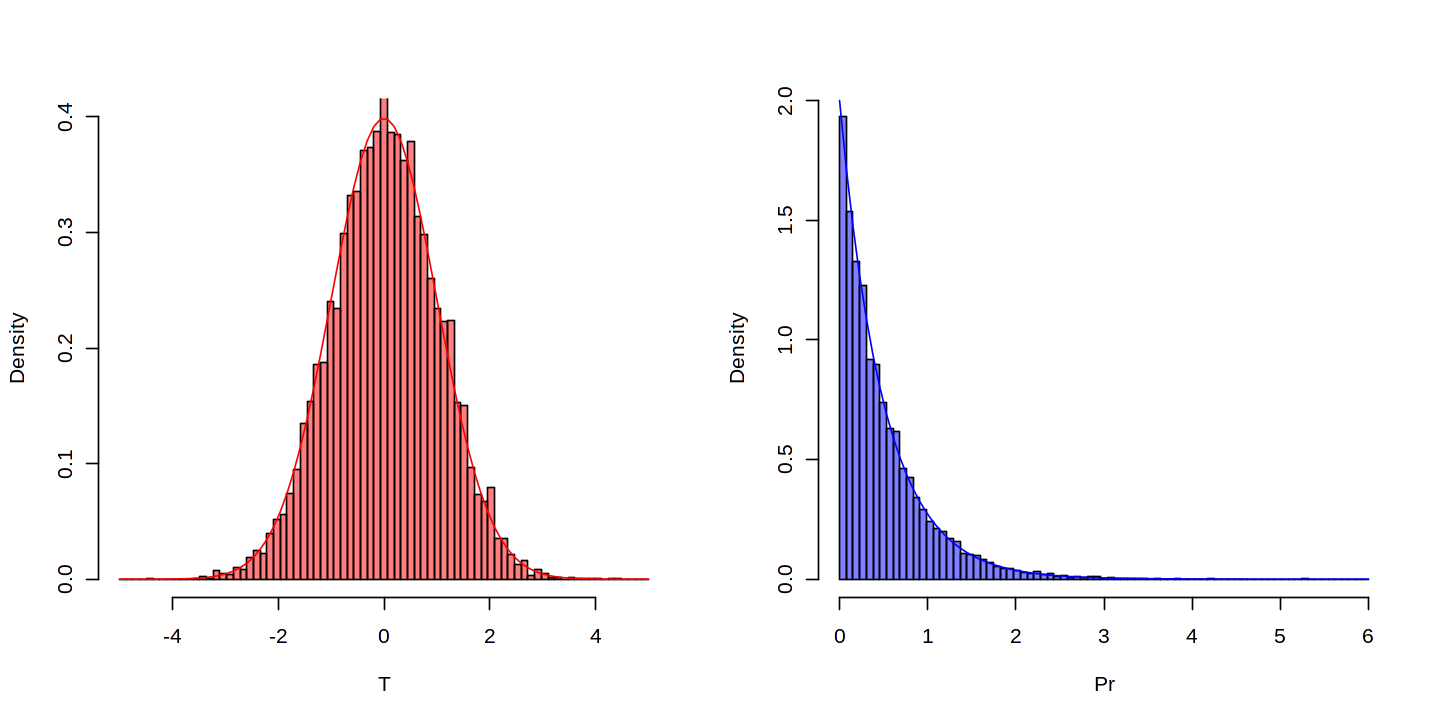

In [285]:
base::options( repr.plot.width = 12 , repr.plot.height = 6 )
graphics::par( mfrow = base::c(1,2) )

x = base::seq( -5 , 5 , length = 80 )
graphics::hist( X[,1] , breaks = x , col = grDevices::rgb(1,0,0,0.5) , probability = TRUE , xlab = "T"  , main = "" , ylim = base::c(0,0.4) )
graphics::lines( x , dnorm(x) , col = "red" )

x = base::seq( 0 , 6 , length = 80 )
graphics::hist( X[,2] , breaks = x , col = grDevices::rgb(0,0,1,0.5) , probability = TRUE , xlab = "Pr" , main = "" )
graphics::lines( x , dexp(x,rate=2) , col = "blue" )
